Below is the function to prep the earning report data. This function will use temp data:"" in order to use show the validity of the function. 

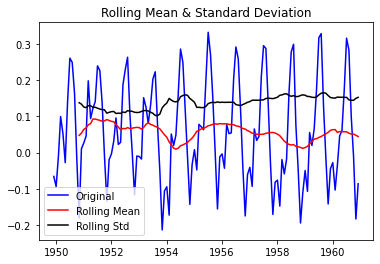

Results of Dickey Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [7]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Perform Dickey–Fuller test:
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(datasetLogScaleMinusMovingAverage)

In [ ]:
def make_stationary(csv_file):
    
    df = pd.read_csv('your_data.csv', parse_dates=['date_column'], index_col='date_column')

    #do first order diffrencing to remove the trend
    df['first_diff'] = df['value_column'].diff()
    
    #find seasonal diffrence 
    #code
    
    #Seasonal diffricing 
    seasonal_period = 12  # Replace with your identified seasonal period, which is the cycle like 12 month cycle ect.
    df['seasonal_diff'] = df['your_value_column'].diff(seasonal_period)


    

In [ ]:
#ACF & PACF 

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#AR Model
#making order=(2,1,0) gives RSS=1.5023

from statsmodels.tsa.statespace.sarimax import SARIMAX

mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

In [ ]:
#Diagnostic check of final model

# Make predictions on the test set
predictions = results.get_forecast(steps=len(test))
predicted_values = predictions.predicted_mean

# Evaluate model performance using MAE
mae = mean_absolute_error(test['value'], predicted_values)
print(f'Mean Absolute Error (MAE): {mae}')

# Set a threshold for MAE
threshold_mae = 0.8  # Replace with your chosen threshold

# Automated decision-making based on MAE
if mae > threshold_mae:
    print('Model performance is below the threshold. Retraining is needed.')
    # Add logic here to trigger model retraining
else:
    print('Model performance is acceptable.')
